<a href="https://colab.research.google.com/github/Bjorn455215/B103021055/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

**標題:** NBA球員三分球命中率與得分表現分析報告

# 摘要

以2024-25年NBA球季的球員數據為資料來源，探討單賽季球員三分球命中率與場均得分之間的關聯性，本作業欲透過資料整理與數據分析等方式，觀察三分球命中率與場均得分多寡是否具有正向關係，研究結果預期透過資料視覺化的方式呈現，藉此提供對於NBA球員得分表現之理解與參考依據。


# 引言

**背景**



近年來，隨著NBA比賽節奏加快以及小球戰術興起，三分球已成為各隊重要的得分手段。

根據統計，NBA球隊每場比賽的三分球出手次數逐年上升，三分球表現直接影響到球隊整體戰績。

因此，探討球員的三分命中率與得分表現的關聯性，具有實際應用價值。

**目的**

分析2024-25年例行賽NBA球員三分球能力與得分能力
之間的關聯性，透過設定出賽場次、場均得分及三分出手次數等篩選條件，選取具代表性的球員群體進行資料整理與統計分析，期望了解三分球表現對得分能力的影響，並以視覺化方式呈現分析結果。

**待答問題**

1.三分球命中率與場均得分之間是否存在顯著的正向關聯？

2.球員總得分中，三分球得分的貢獻程度如何？

3.本賽季球員的三分球命中率(3P%)分布情形為何？是否偏低或偏高？

## 方法

**數據來源**

本研究所使用之資料來自於公開網站 Basketball-Reference 2024-25 NBA Player Per Game Stats。

**分析工具**



*   Python（數據處理與分析）
*   Pandas/Seaborn（數據清理與統計分析）
*   Matplotlib（數據視覺化）

**資料篩選標準**

為確保資料分析之品質與代表性，本研究設定以下篩選條件以篩選球員樣本：
* 整季出賽場次 ≥ 30(40)場

* 場均三分出手次數（3PA）≥ 0.8次

* 如果前25名中有人不符合，就從第26名、第27名…遞補

等條件。

**數據處理**

1.讀取CSV檔案，計算場均得分及場均三分球出手次數，依照條件進行資料篩選。

2.計算三分命中率與場均得分之平均值、標準差、最大值與最小值，並繪製直方圖。

3.繪製三分命中率與場均得分之散佈圖

4.辨識異常球員（如三分命中率偏低但得分突出的案例），進行分析討論。

# 中文字體下載

In [23]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-04-27 15:42:05--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.125.113, 108.177.125.101, 108.177.125.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-27 15:42:05--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.170.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.170.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-04-27 15:42

In [24]:
import matplotlib
import matplotlib.pyplot as plt
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

#  問題1資料導入

**Step 1: 從 Basketball-Reference 讀取 2024-25**

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 指定 Basketball-Reference 的 2024-25 球季 per game 網址
url = 'https://www.basketball-reference.com/leagues/NBA_2025_per_game.html'

# 使用 read_html 讀取所有表格，Basketball-Reference 網站的表格通常都可以直接讀
tables = pd.read_html(url)

# Basketball-Reference上的 per game stats是頁面第一個table
df = tables[0]

# 顯示前5筆資料，確認有成功載入
df.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.00,Shai Gilgeous-Alexander,26.00,OKC,PG,76.00,76.00,34.20,11.30,21.80,...,0.90,4.10,5.00,6.40,1.70,1.00,2.40,2.20,32.70,NaN
1,2.00,Giannis Antetokounmpo,30.00,MIL,PF,67.00,67.00,34.20,11.80,19.70,...,2.20,9.70,11.90,6.50,0.90,1.20,3.10,2.30,30.40,NaN
2,3.00,Nikola Jokić,29.00,DEN,C,70.00,70.00,36.70,11.20,19.50,...,2.90,9.90,12.70,10.20,1.80,0.60,3.30,2.30,29.60,NaN
3,4.00,Luka Dončić,25.00,2TM,PG,50.00,50.00,35.40,9.20,20.50,...,0.80,7.40,8.20,7.70,1.80,0.40,3.60,2.50,28.20,NaN
4,4.00,Luka Dončić,25.00,DAL,PG,22.00,22.00,35.70,9.80,21.20,...,0.70,7.60,8.30,7.80,2.00,0.40,3.40,2.60,28.10,NaN


**Step 2: 清理資料**

In [3]:
# 清理資料，有球員季中轉隊，轉隊後又符合篩選條件導致有兩欄同個球員的數據
df = df[df['Player'] != 'Player']
df.reset_index(drop=True, inplace=True)

# 將數值欄位轉為數字
cols_to_numeric = ['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
                   '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
                   'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
                   'STL', 'BLK', 'TOV', 'PF', 'PTS']

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')


**STEP 3：處理轉隊球員，只保留TOT行**

In [4]:
# 找出Team欄位結尾是"TM"的球員（2TM, 3TM, 4TM等等）
players_with_tm = df[df['Team'].fillna('').str.endswith('TM')]['Player'].unique()

# 保留2TM/3TM/4TM，不保留單隊資料
df = df[~((df['Player'].isin(players_with_tm)) & (~df['Team'].fillna('').str.endswith('TM')))]


**STEP 4：根據得分排序，從高到低排列**

In [5]:
# 依場均得分 (PTS) 排序
df_sorted = df.sort_values(by='PTS', ascending=False).reset_index(drop=True)


**STEP 5：套用篩選條件，並補滿25名球員**

In [6]:
# 找到符合條件的球員：出賽 >30場且場均3PA≥0.8
condition = (df_sorted['G'] > 30) & (df_sorted['3PA'] >= 0.8)

# 先過濾符合條件的球員
df_filtered = df_sorted[condition]

# 取前25名（如果不足25，會自動從符合條件的後面補上）
df_top25_final = df_filtered.head(25)


**STEP 6：整理欄位順序（跟網站一致）**

In [11]:
# 保留需要的欄位
# 新的欄位順序（只挑你要的）
final_columns = ['Player', 'Team', 'G', 'GS',
                 'FG', 'FGA', 'FG%',
                 '3P', '3PA', '3P%',
                 '2P', '2PA', '2P%',
                 'FT', 'FTA', 'FT%',
                 'PTS']

# 只選這些欄位
df_top25_final_display = df_top25_final[final_columns].reset_index(drop=True)

# 把index從1開始編號
df_top25_final_display.index = df_top25_final_display.index + 1

**STEP 7：顯示結果**

In [12]:
# 格式化顯示
pd.set_option('display.float_format', '{:.2f}'.format)

# 輸出結果
df_top25_final_display


,Player,Team,G,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PTS
1,Shai Gilgeous-Alexander,OKC,76.00,76.00,11.30,21.80,0.52,2.10,5.70,0.38,9.20,16.10,0.57,7.90,8.80,0.90,32.70
2,Giannis Antetokounmpo,MIL,67.00,67.00,11.80,19.70,0.60,0.20,0.90,0.22,11.60,18.70,0.62,6.50,10.60,0.62,30.40
3,Nikola Jokić,DEN,70.00,70.00,11.20,19.50,0.58,2.00,4.70,0.42,9.30,14.80,0.63,5.20,6.40,0.80,29.60
4,Luka Dončić,2TM,50.00,50.00,9.20,20.50,0.45,3.50,9.60,0.37,5.70,10.90,0.52,6.20,7.90,0.78,28.20
5,Anthony Edwards,MIN,79.00,79.00,9.10,20.40,0.45,4.10,10.30,0.40,5.10,10.10,0.50,5.30,6.30,0.84,27.60
6,Jayson Tatum,BOS,72.00,72.00,9.20,20.30,0.45,3.50,10.10,0.34,5.70,10.20,0.56,5.00,6.10,0.81,26.80
7,Kevin Durant,PHO,62.00,62.00,9.50,18.10,0.53,2.60,6.00,0.43,7.00,12.10,0.57,4.90,5.80,0.84,26.60
8,Tyrese Maxey,PHI,52.00,52.00,9.20,21.00,0.44,3.10,9.20,0.34,6.10,11.80,0.52,4.90,5.60,0.88,26.30
9,Cade Cunningham,DET,70.00,70.00,9.80,20.80,0.47,2.10,6.00,0.36,7.60,14.80,0.52,4.50,5.30,0.85,26.10
10,Jalen Brunson,NYK,65.00,65.00,9.00,18.50,0.49,2.30,6.10,0.38,6.70,12.40,0.54,5.70,6.90,0.82,26.00


# 問題2資料導入

**Step 1 :從 Basketball-Reference 網站讀取總數據表格**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://www.basketball-reference.com/leagues/NBA_2025_totals.html'

# 讀取網站上的所有表格
tables = pd.read_html(url)

# 抓取第一個表格（總得分總數據）
df_totals = tables[0]


**Step 2: 去除中間重複的表頭列**

In [26]:
# 只保留 Player 欄位不是 'Player' 的資料（排除中間的表頭）
df_totals = df_totals[df_totals['Player'] != 'Player']

**Step 3:選擇需要的欄位**

In [27]:
df_totals = df_totals[['Player', 'Team', 'G', 'PTS', '3P']]

**Step 4:把資料型態轉成數值型態（避免後面運算錯誤）**

In [28]:
df_totals['G'] = pd.to_numeric(df_totals['G'], errors='coerce')
df_totals['PTS'] = pd.to_numeric(df_totals['PTS'], errors='coerce')
df_totals['3P'] = pd.to_numeric(df_totals['3P'], errors='coerce')

**Step 5:處理球員轉隊的情況（保留TOT或合併）**

In [30]:
# 把Team欄位是 'TOT' 的玩家列出
players_with_tot = df_totals[df_totals['Team'] == 'TOT']['Player'].unique()

# 保留TOT紀錄 或 原本就只有單一隊的球員
df_totals = df_totals[(df_totals['Team'] == 'TOT') | (~df_totals['Player'].isin(players_with_tot))]

**Step6:加入篩選條件**

In [31]:
df_totals = df_totals[df_totals['G'] > 30] #出賽超過30場
df_top25_totals = df_totals.sort_values(by='PTS', ascending=False).head(25) #總得分前25名

**Step 7:列出總得分前25人**

In [36]:
# 顯示前25名球員的名字和總得分、總三分命中數
df_top25_totals = df_totals.sort_values(by='PTS', ascending=False).head(25)

# 重新編號
df_top25_totals = df_top25_totals.reset_index(drop=True)
df_top25_totals.index += 1


df_top25_totals[['Player', 'Team', 'G', 'PTS', '3P']]

,Player,Team,G,PTS,3P
1,Shai Gilgeous-Alexander,OKC,76.00,2484.00,163.00
2,Anthony Edwards,MIN,79.00,2177.00,320.00
3,Nikola Jokić,DEN,70.00,2071.00,138.00
4,Giannis Antetokounmpo,MIL,67.00,2036.00,14.00
5,Jayson Tatum,BOS,72.00,1932.00,250.00
6,Devin Booker,PHO,75.00,1923.00,183.00
7,Trae Young,ATL,76.00,1841.00,218.00
8,Tyler Herro,MIA,77.00,1840.00,251.00
9,Cade Cunningham,DET,70.00,1830.00,149.00
10,James Harden,LAC,79.00,1802.00,235.00


# 問題3資料導入

**Step 1: 資料準備**

In [85]:
import pandas as pd
url = 'https://www.basketball-reference.com/leagues/NBA_2025_per_game.html'
tables = pd.read_html(url)

df_per_game = tables[0]

df_per_game = df_per_game[df_per_game['Player'] != 'Player']

df_per_game = df_per_game[['Player','Team','G', '3P%']]

df_per_game['G'] = pd.to_numeric(df_per_game['G'], errors='coerce')
df_per_game['3P%'] = pd.to_numeric(df_per_game['3P%'], errors='coerce')

**Step 2:去除G或3P%是NaN的資料（有些球員可能沒出手三分，導致3P%是空值）**

In [86]:
df_per_game = df_per_game.dropna(subset=['G', '3P%'])

**Step 3:篩選出場場數大於40場(半個賽季)**

In [90]:
df_per_game = df_per_game[df_per_game['G'] > 40]

**Step 4:清理TOT紀錄**

In [93]:
players_with_tot = df_per_game[df_per_game['Team'] == 'TOT']['Player'].unique()
df_clean = df_per_game[
    (df_per_game['Team'] == 'TOT') |
    (~df_per_game['Player'].isin(players_with_tot))
]

**Step 5:結果**

In [94]:
df_clean = df_clean.reset_index(drop=True)
df_clean[['Player', 'G', '3P%']]

,Player,G,3P%
0,Shai Gilgeous-Alexander,76.00,0.38
1,Giannis Antetokounmpo,67.00,0.22
2,Nikola Jokić,70.00,0.42
3,Luka Dončić,50.00,0.37
4,Anthony Edwards,79.00,0.40
...,...,...,...
344,Johnny Furphy,50.00,0.30
345,Dwight Powell,55.00,0.40
346,Tyler Kolek,41.00,0.30
347,Alex Len,46.00,0.22


# 結果分析

**1.三分球命中率與場均得分之間是否存在顯著的正向關聯？**

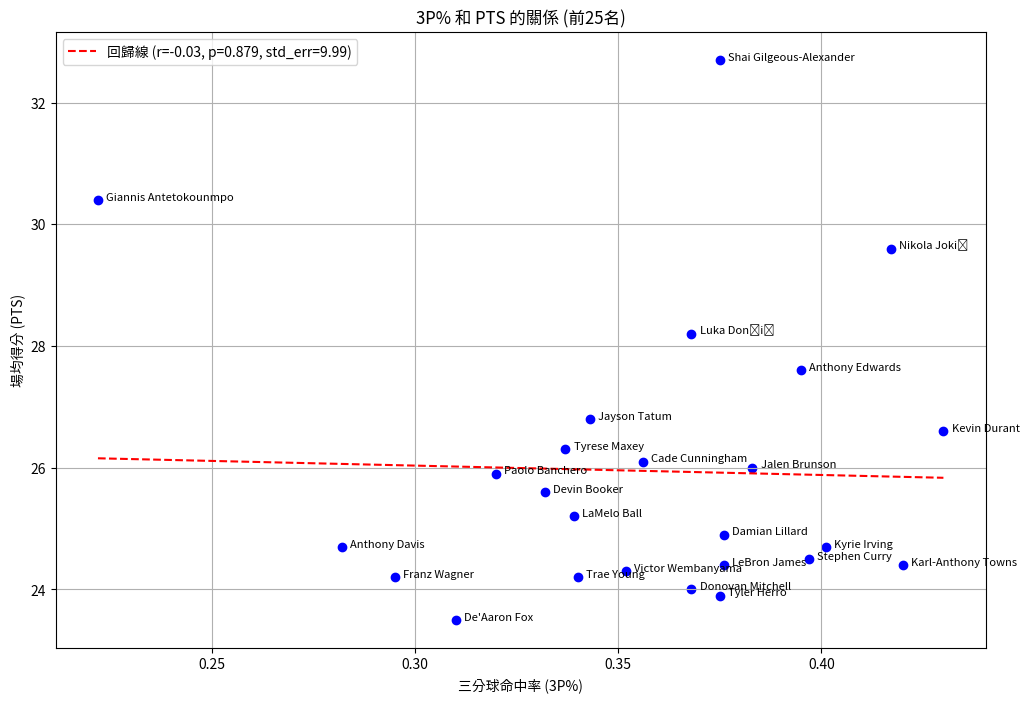

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress #導入線性迴歸分析模組

# 設定圖大小
plt.figure(figsize=(12,8))

# 畫散佈圖
plt.scatter(df_top25_final_display['3P%'], df_top25_final_display['PTS'], color='blue')

# 加上每個球員名字
for i in range(df_top25_final_display.shape[0]): #從0跑到24，因為有25筆資料
    plt.text(df_top25_final_display['3P%'].iloc[i]+0.002, # +0.002 避免文字和點重疊
             df_top25_final_display['PTS'].iloc[i], #垂直位置就是這個球員的場均得分
             df_top25_final_display['Player'].iloc[i], #顯示球員名字
             fontsize=8)

# 設定座標軸
plt.xlabel('三分球命中率 (3P%)')
plt.ylabel('場均得分 (PTS)')
plt.title('3P% 和 PTS 的關係 (前25名)')
plt.grid(True)

# 畫趨勢線
slope, intercept, r_value, p_value, std_err = linregress(df_top25_final_display['3P%'], df_top25_final_display['PTS'])
#p_value	:這個相關性是不是統計上「顯著」，p>0.05 相關性不顯著
#std_err	斜率的估計誤差，衡量線的穩定性(越小越好)

x_vals = np.linspace(df_top25_final_display['3P%'].min(), df_top25_final_display['3P%'].max(), 100)
#	讓回歸線在x方向上平滑延伸

y_vals = slope * x_vals + intercept
#對應這些x座標，用回歸公式算出來的y座標（場均得分PTS）

plt.plot(x_vals, y_vals, color='red', linestyle='--', label=f'回歸線 (r={r_value:.2f}, p={p_value:.3f}, std_err={std_err:.2f})')

# 顯示圖例
plt.legend()

# 顯示圖
plt.show()


由上圖散布圖可以看出，三分球命中率和場均得分幾乎沒什麼正相關性，p值0.879代表相關性非常不顯著，std_err(標準誤差)為9.99代表趨勢線幾乎無意義。

因此在得分表現上，單純三分命中率並非決定性因素，其他因素如出手數量、罰球效率、內線得分能力亦扮演重要角色。

**2.球員總得分中，三分球得分的貢獻程度如何？？**

<ipython-input-41-f3f454ede5f4>:26: UserWarning: Glyph 263 (\N{LATIN SMALL LETTER C WITH ACUTE}) missing from font(s) Taipei Sans TC Beta.
  plt.tight_layout()


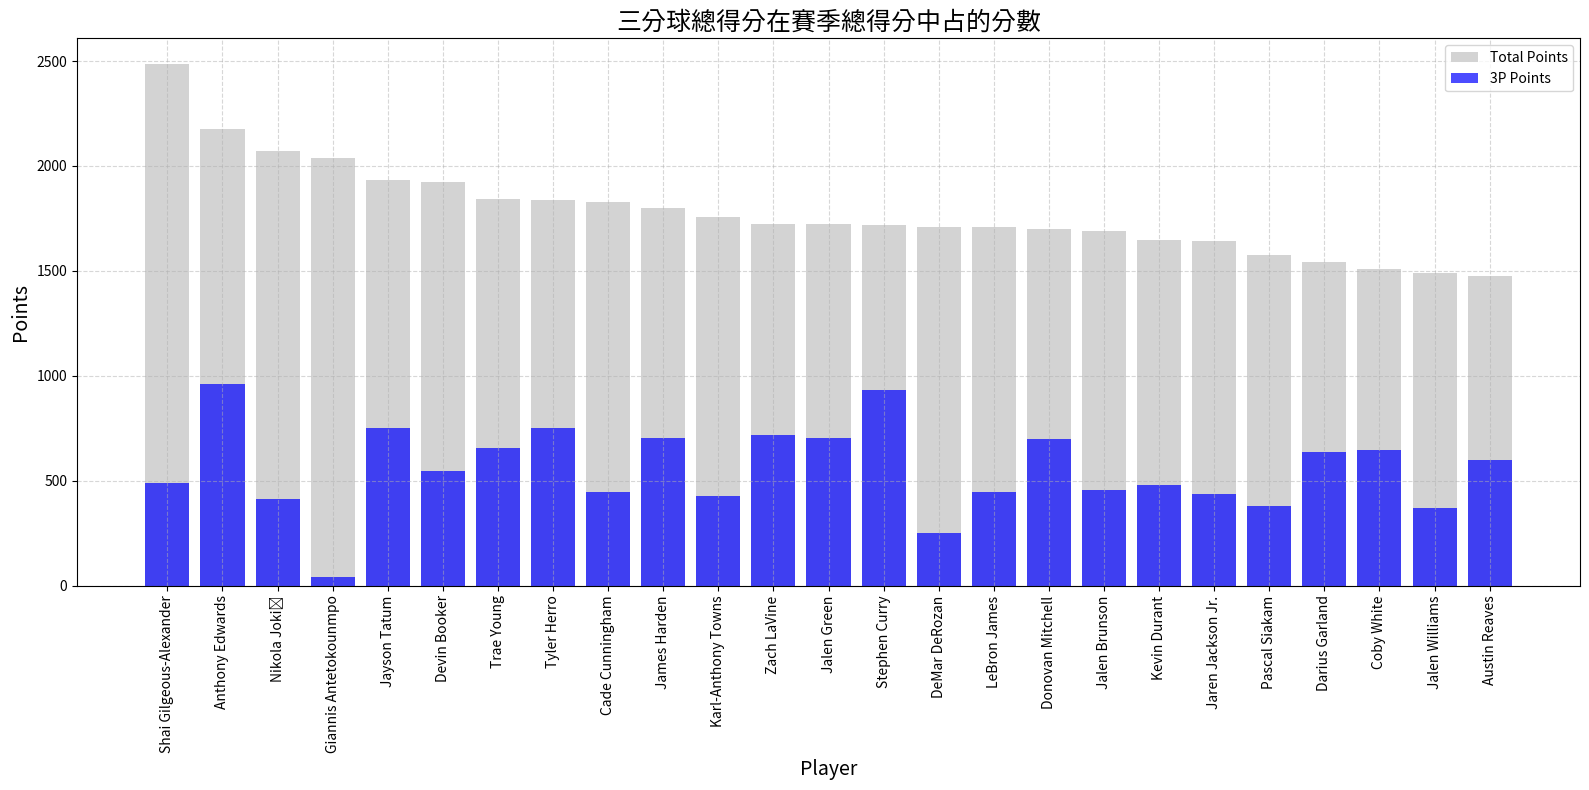

In [41]:
import matplotlib.pyplot as plt

# 三分球總得分
df_top25_totals['3P_Score'] = df_top25_totals['3P'] * 3

# 畫長條圖

plt.figure(figsize=(16,8))

# 畫底層：總得分（背景色）
plt.bar(df_top25_totals['Player'], df_top25_totals['PTS'],
        color='lightgrey', label='Total Points')

# 畫上層：三分得分（覆蓋上去，設定半透明）
plt.bar(df_top25_totals['Player'], df_top25_totals['3P_Score'],
    color='blue', alpha=0.7, label='3P Points')
    #alpha 0.7讓長條圖有點透明感，好觀察三分得分的比例

# 設定座標軸與標題
plt.xlabel('Player', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.title('三分球總得分在賽季總得分中占的分數', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


由長條圖可以看出以下幾點:

1.得分結構差異顯著
* 雖然大部分球員的得分來源包含三分球，但各球員三分得分比例差異很大。

2.三分球比重高的球員
* 如 Stephen Curry、Anthony Edwards，三分球得分佔了非常大的比例，可以看出這些球員主要依賴三分球得分。

3.三分球比重低的球員
* 如 Giannis Antetokounmpo、DeMar DeRozan，他們的三分球得分佔比非常小，可以推測多數得分來自禁區、兩分球或罰球，不依賴三分球得分。

4.總得分高但三分得分一般的球員
* 如Shai Gilgeous-Alexander、Devin Booker，雖然三分球得分不低，但與總得分相比仍屬於「中等貢獻」，代表得分手段多元。

**3.本賽季球員的三分球命中率(3P%)分布情形為何？是否偏低或偏高？**

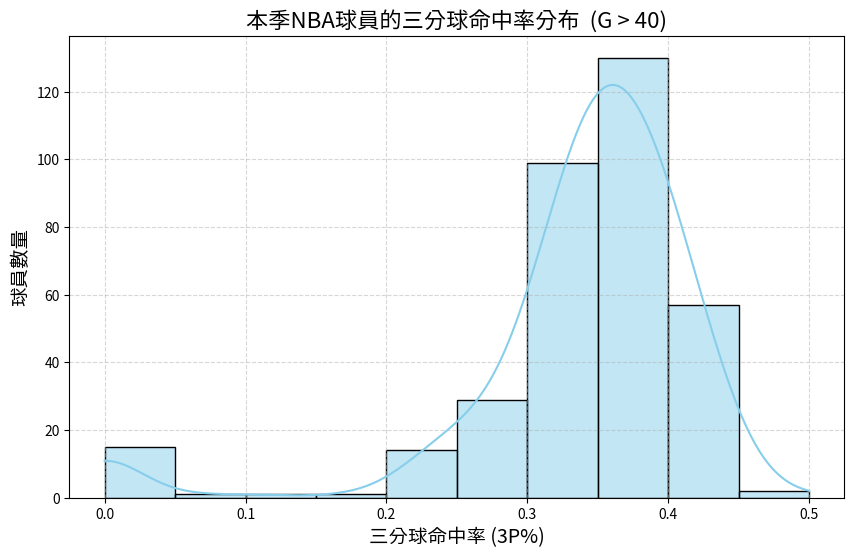

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1：設定圖形大小
plt.figure(figsize=(10,6))

# Step 2：畫出直方圖+曲線
sns.histplot(df_clean['3P%'], bins=10,kde=True, color='skyblue', edgecolor='black')

# Step 3：標題與標籤
plt.xlabel('三分球命中率 (3P%)', fontsize=14)
plt.ylabel('球員數量', fontsize=14)
plt.title('本季NBA球員的三分球命中率分布  (G > 40)', fontsize=16)

# Step 4：加上輕微的格線（讓圖更好讀）
plt.grid(True, linestyle='--', alpha=0.5)

# Step 5：顯示圖形
plt.show()


由上方直方圖搭配曲線來看，大部分球員的三分球命中率（3P%）**集中在30%至40%**之間，其中三分命中率介於 **35% 左右的球員數量最多**，為分布的主要高峰區。

此外，分布形態呈現輕微右偏，多數球員命中率屬於中等範圍，少數球員能達到高於40%的外線命中率。

# 結論與建議

**結論**

1.經由散佈圖與線性回歸分析，發現三分球命中率（3P%）與場均得分（PTS）之間的線性相關性極低，相關係數（r值）接近0，表示三分球命中率本身與得分表現並未呈現顯著正向關聯。

2.從球員總得分與三分球得分的重疊長條圖可以觀察到，大部分高得分球員的得分來源不單依賴三分球，即使三分球得分占比高的球員也未必是總得分最高者，顯示現代NBA得分來源趨向多元化，三分球僅是其中之一環。

3.本賽季出賽超過40場的球員三分球命中率大多集中在30%至40%之間，分布呈現輕微右偏態，少數球員命中率突破40%，整體外線能力維持中高水準，外線投射已成為現代NBA球員的重要基本技能。

**建議**

1.未來可依照球員位置（PG、SG、SF、PF、C）分類三分球命中率與得分表現，探討不同位置角色對三分球依賴度的差異。

2.可以將得分結構進行細項分析，區分二分球、三分球與罰球各自對總得分的貢獻比例，以更全面理解球員得分模式。

3.可以將歷年賽季的比較分析，檢視三分球命中率、出手量、與得分模式在不同年代間的演變趨勢，評估外線戰術對聯盟風格的長期影響。